# Exploratory Data Analysis (EDA)

In this notebook, we perform Exploratory Data Analysis (EDA) on the preprocessed stock dataset.  
The goal is to understand the data better, identify trends, seasonality, volatility, and visualize potential anomalies before feature engineering and modeling.


## Import Libraries & Load Data

We begin by importing the necessary Python libraries for analysis and loading the cleaned dataset created during the data preprocessing stage.


In [2]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../Data/processed/cleaned_stocks.csv")
df.head()


,Date,Close,High,Low,Open,Volume
0,2023-01-03,123.330650,129.079567,122.443165,128.468194,112117500
1,2023-01-04,124.602699,126.870716,123.340502,125.125327,89113600
2,2023-01-05,123.281349,125.993105,123.024970,125.362006,80962700
3,2023-01-06,127.817383,128.478063,123.153167,124.257594,87754700
4,2023-01-09,128.339981,131.554654,128.083602,128.655538,70790800


## Data Overview

Check dataset structure, column names, datatypes, and missing values. This helps confirm the integrity of the cleaned dataset.


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1507 non-null   object 
 1   Close   1507 non-null   float64
 2   High    1507 non-null   float64
 3   Low     1507 non-null   float64
 4   Open    1507 non-null   float64
 5   Volume  1507 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 70.8+ KB
None
             Close         High          Low         Open        Volume
count  1507.000000  1507.000000  1507.000000  1507.000000  1.507000e+03
mean    188.696439   191.256677   185.837650   188.499340  7.467256e+07
std      52.267733    53.623836    50.866621    52.335765  4.204702e+07
min      83.120003    85.419998    81.430000    83.029999  1.500750e+07
25%     162.812500   164.869695   160.509995   162.775002  4.494440e+07
50%     183.279999   185.380516   181.229996   183.502384  5.995080e+07
75%     218.065002   221.0

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


## Time Series Visualization

Plot stock closing prices over time to observe general trends, seasonality, and volatility.


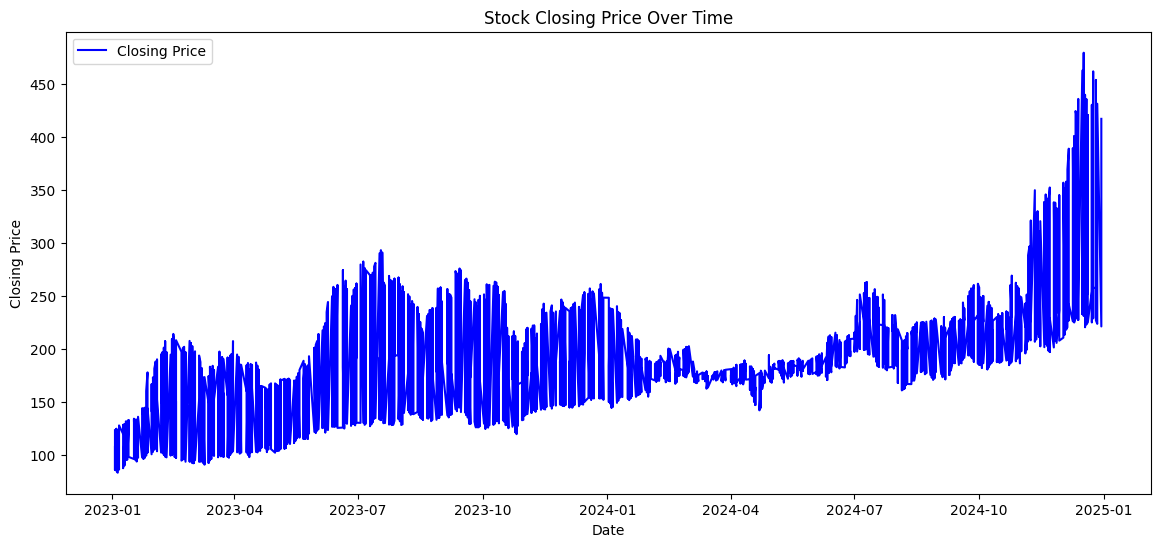

In [6]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()


## Moving Averages

Compute and visualize moving averages to smooth short-term fluctuations and identify long-term trends.


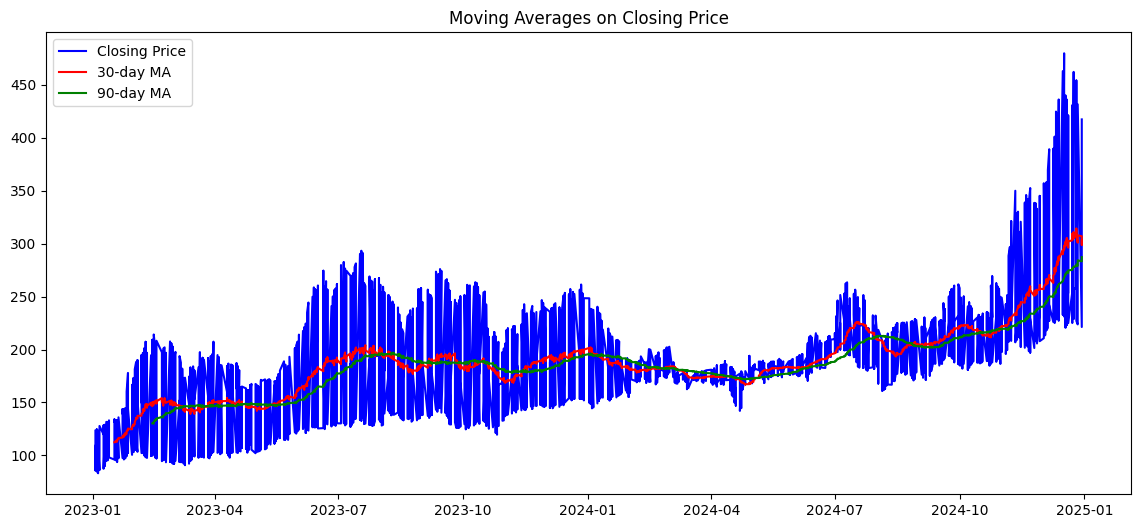

In [7]:
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA90'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue')
plt.plot(df['Date'], df['MA30'], label="30-day MA", color='red')
plt.plot(df['Date'], df['MA90'], label="90-day MA", color='green')
plt.title("Moving Averages on Closing Price")
plt.legend()
plt.show()


## Boxplots & Distribution

Boxplots and histograms help identify unusual spikes, volatility, and overall distribution of stock prices.


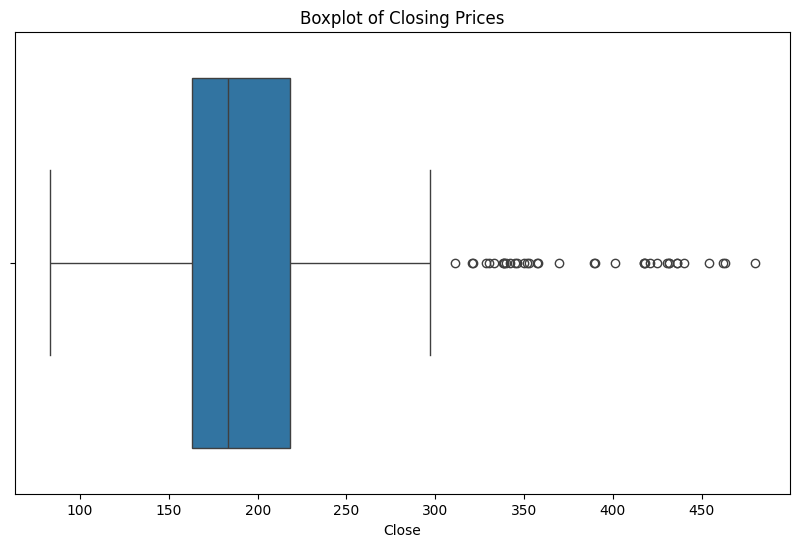

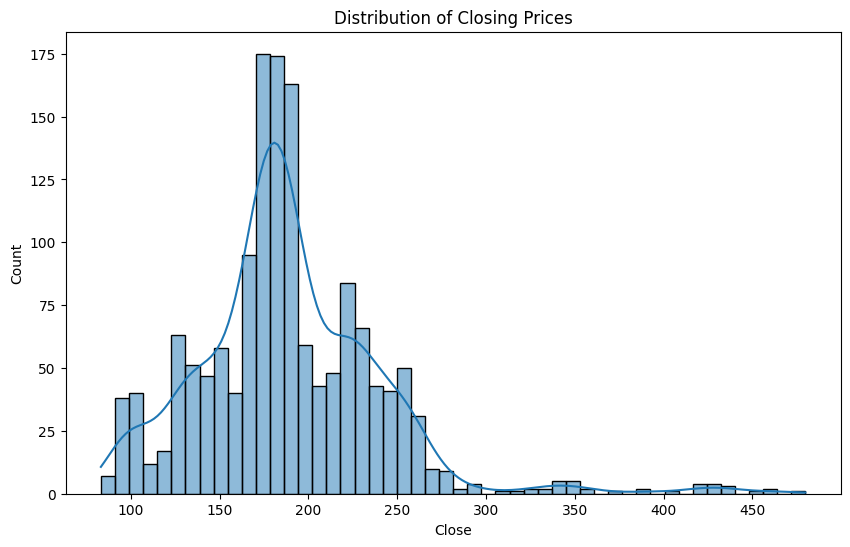

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Closing Prices")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Close'], kde=True, bins=50)
plt.title("Distribution of Closing Prices")
plt.show()


## Volume Analysis

Analyze trading volume trends, as abnormal spikes in volume may indicate unusual activity or anomalies.


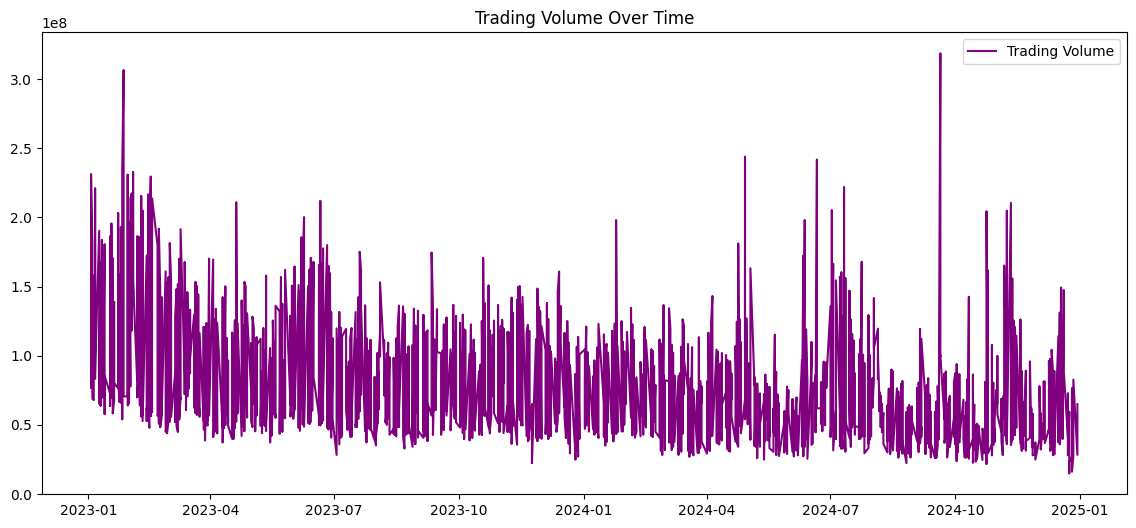

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume'], label="Trading Volume", color='purple')
plt.title("Trading Volume Over Time")
plt.legend()
plt.show()


## Correlation Analysis

Correlation heatmaps help understand relationships between variables such as Open, High, Low, Close, and Volume.


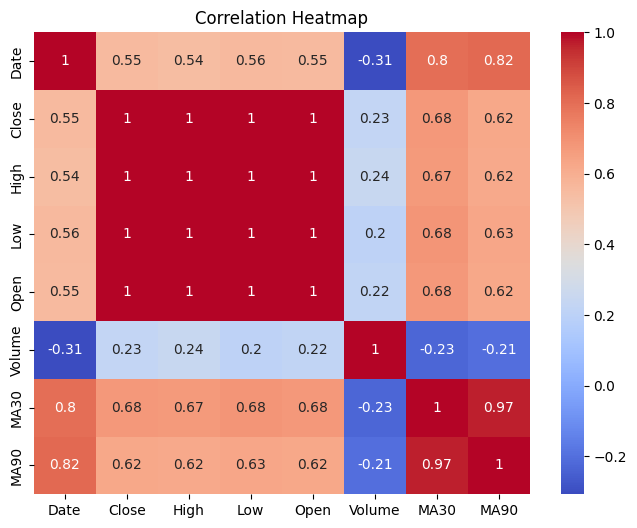

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Summary of EDA

- The stock data shows clear long-term trends and volatility.  
- Moving averages help smooth fluctuations and reveal underlying patterns.  
- Boxplots and histograms highlight outliers in closing prices.  
- Volume analysis indicates potential unusual trading days.  
- Correlation analysis confirms strong relationships between Open, High, Low, and Close prices.  

These insights will guide the next step: **Feature Engineering**, where we create derived features such as returns, volatility, and moving averages for anomaly detection.
